# Iris Dataset Analysis using Unsupervised Learning

This analysis involes:
1. K-means clustering
2. principal component analysis algorithm 
3. Convert the 'Species' column to categorical data type
4. Remove the 'Species' column and store it separately
5. Plotting the graphs for k-mean clustering and pca

In [1]:
# loading libraries for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# K-means Clustering function
def kmeans_clustering(dataset, k):
    # Randomly initialize cluster centers
    np.random.seed(0)
    centroids = dataset[np.random.choice(range(len(dataset)), size=k, replace=False)]

    # Initialize variables
    prev_centroids = np.zeros(centroids.shape)
    clusters = np.zeros(len(dataset))
    converged = False

    # Iterate until convergence
    while not converged:
        # Assign each data point to the closest centroid
        for i in range(len(dataset)):
            distances = np.linalg.norm(dataset[i] - centroids, axis=1)
            clusters[i] = np.argmin(distances)

        # Update centroids
        for j in range(k):
            centroids[j] = np.mean(dataset[clusters == j], axis=0)

        # Check for convergence
        if np.allclose(centroids, prev_centroids):
            converged = True

        prev_centroids = centroids.copy()

    return clusters

In [4]:
# principal component analysis algorithm 
def pca(dataset):
    # Center the dataset
    centered_dataset = dataset - np.mean(dataset, axis=0)

    # Compute the covariance matrix
    cov_matrix = np.cov(centered_dataset.T)

    # Compute the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # Sort the eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Project the centered dataset onto the eigenvectors
    projected_data = np.dot(centered_dataset, eigenvectors)

    return projected_data, eigenvalues

In [12]:
# Load the Iris dataset
df = pd.read_csv('Iris Dataset.csv')

In [13]:
# Convert the 'Species' column to categorical data type
df['Species'] = df['Species'].astype('category')

In [14]:
# Remove the 'Species' column and store it separately
# data cleaning
species = df['Species']
df = df.drop('Species', axis=1)

In [15]:
# Convert the dataframe to a NumPy array
dataset = df.values

In [16]:
# Perform K-Means Clustering with k=3
k = 3
clusters = kmeans_clustering(dataset, k)

In [17]:
# Perform Principal Component Analysis algorithm
projected_data, eigenvalues = pca(dataset)

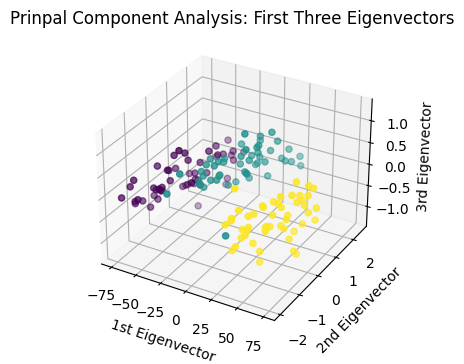

In [30]:
# Ploting the first three eigenvectors
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(projected_data[:, 0], projected_data[:, 1], projected_data[:, 2], c=clusters)
ax.set_xlabel('1st Eigenvector')
ax.set_ylabel('2nd Eigenvector')
ax.set_zlabel('3rd Eigenvector')
plt.title('Prinpal Component Analysis: First Three Eigenvectors')
plt.show()


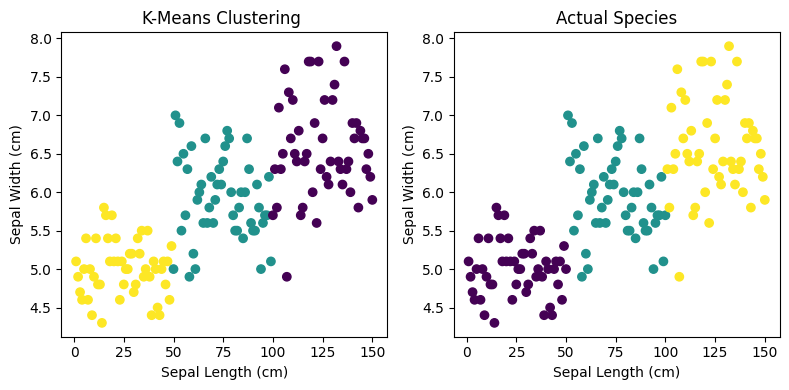

In [31]:
# Ploting the clusters and the actual species
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].scatter(dataset[:, 0], dataset[:, 1], c=clusters)
axs[0].set_xlabel('Sepal Length (cm)')
axs[0].set_ylabel('Sepal Width (cm)')
axs[0].set_title('K-Means Clustering ')
axs[1].scatter(dataset[:, 0], dataset[:, 1], c=species.cat.codes)
axs[1].set_xlabel('Sepal Length (cm)')
axs[1].set_ylabel('Sepal Width (cm)')
axs[1].set_title('Actual Species')
plt.tight_layout()
plt.show()
